# Table of Contents: 
 
> ## 1. [Importing Libraries](#libraries)
> ## 2. [Data](#data)
> > ## 2.1 [Loading Data](#loading-data)
> > ## 2.2 [Exploring Data](#exploring-data)
> ## 3. [Data Cleaning and Feature Engineering](#data-cleaning)
> ## 4. [Artificial Neural Network](#ann)
> > ## 4.1 [Model Architecture](#architecture)
> > ## 4.2 [Model Training](#training)
> > ## 4.3 [Model Evaluation](#evaluation)

<br/>
<br/>

# 📚🔄 Importing Libraries <a class="anchor" id="libraries"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from transformers import pipeline
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<br/>
<br/>

# Data <a class="anchor" id="data"></a>
> # ⏳📑 Loading Data <a class="anchor" id="loading-data"></a>

In [2]:
df = pd.read_csv('AirlineReviews.csv')
df = df.drop(['Unnamed: 0'], axis=1)

<br/>
<br/>

> # 📊🔍 Exploring Data <a class="anchor" id="exploring-data"></a>

In [3]:
df.head()

,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [4]:
def df_info(dataframe):
    
    return pd.DataFrame(
        {'unique_vals': df.nunique(),
         'len': len(df),
         'types':df.dtypes,
         'nulls' : df.isna().sum(),
          
        }, columns = ['unique_vals', 'len','types','nulls']).sort_values(by ='unique_vals',ascending = False)
    
 

In [5]:
## Some Features have a lot of nulls.  
## These will be dropped later
df_info(df)

,unique_vals,len,types,nulls
ReviewBody,3692,3701,object,0
Name,2906,3701,object,0
ReviewHeader,2684,3701,object,0
Datetime,1820,3701,object,0
Route,1590,3701,object,775
Aircraft,202,3701,object,1779
DateFlown,112,3701,object,778
OverallRating,10,3701,float64,5
SeatComfort,5,3701,float64,116
CabinStaffService,5,3701,float64,127


In [6]:
def plots(column ) -> None:
    '''
    Basic Histogram and Boxplot by feature (column).
    
    param1: feature must be a float
    return: Histogram and Boxplot for that feature. 
    
    '''
    fig, ax = plt.subplots(1,2, figsize=(8,1.5))
    
    hist = sns.histplot(data=df  , x=column, discrete=True,  ax=ax[0], color='tomato' )
    hist.set_xticks( range(1,int(df[column].max())+1))
    hist.set_title(f'{column} Histogram')
    ax[0].set_title(f'{column} Histogram')
    box = sns.boxplot(data=df, x=column, ax=ax[1], color='mediumpurple')
    
    ax[1].set_title(f'{column} Boxplot')
   
     
    return None 

In [7]:
# Getting the features with numerical types
# Some of these numerical features have many nulls
# For example "Wifi&Connectivity" has 3092/37701 nulls
numerical_features = df_info(df)[df_info(df).types=='float64'].index

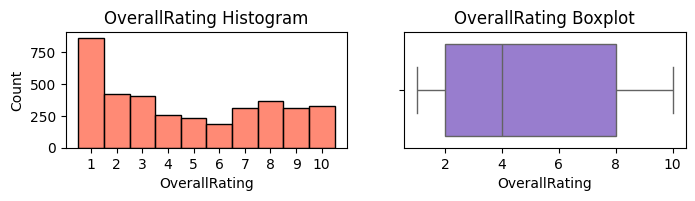

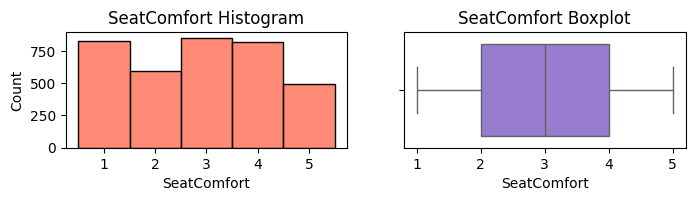

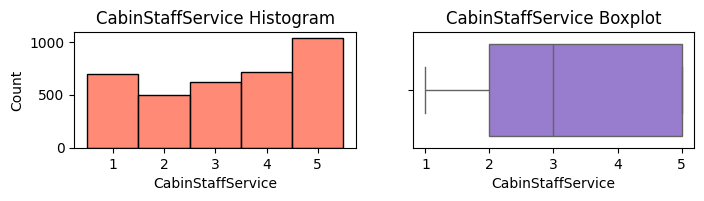

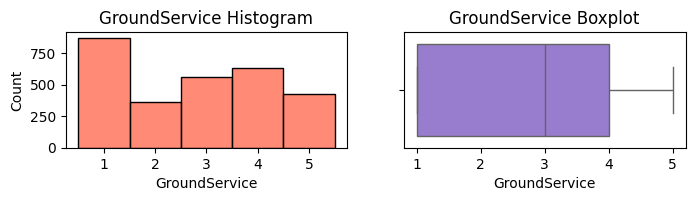

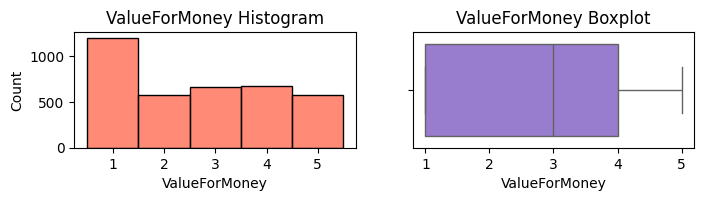

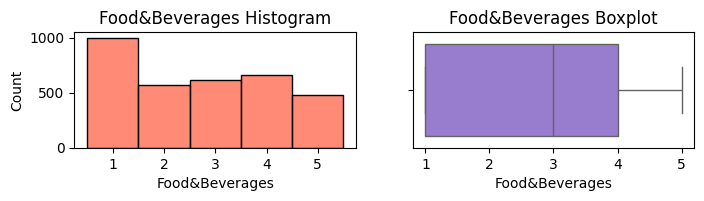

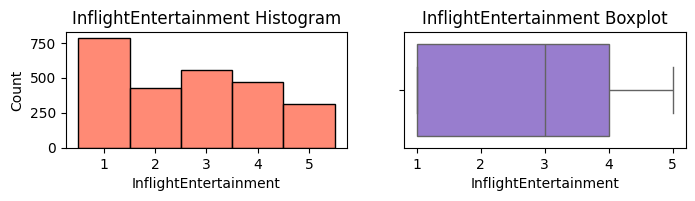

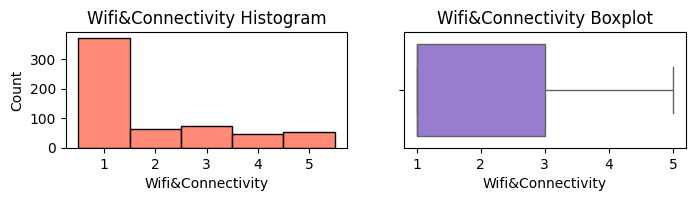

In [8]:
for feature in numerical_features:
    plots(feature)

In [9]:
def ratings_by_feature(feature, feature_type) -> None:
    '''
    Returns Pie Chart of corresponding feature and Histogram of Overall Ratings by feature_type (feature class)

    feature: ['SeatType', 'TypeOfTraveller', 'Recommended','VerifiedReview']
    feature_type:{
        'SeatType': ['Economy Class','Business Class','Premium Economy','First Class'],
        'TypeOfTraveller': ['Couple Leisure','Business','Solo Leisure','Family Leisure'],
        'Recommended': ['no', 'yes'],
        'VerifiedReview': [True, False]
        }
    return None
    '''
    labels = df[feature].dropna().unique()
 
    sizes = [df[feature].value_counts()[feature_type] for feature_type in labels]
    explode = tuple([0.10 if label == feature_type else .01 for label in labels])  
    
    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    plt.style.use('default')
    ax[0].pie(sizes, explode=explode, labels=labels,textprops={'size': 9}, autopct='%.1f%%',
    shadow=True , radius=.85, startangle=90, pctdistance=.75,
            colors=sns.color_palette('Set2'))
     
    hist = sns.histplot(data=df[df[feature]==feature_type]   , x='OverallRating', discrete=True,    color='mediumorchid' )
    
    ax[1].set_xticks( range(1,int(df['OverallRating'].max())+1))
    ax[1].set_title(f'{feature_type}  Histogram')
    
    plt.show()
    return None

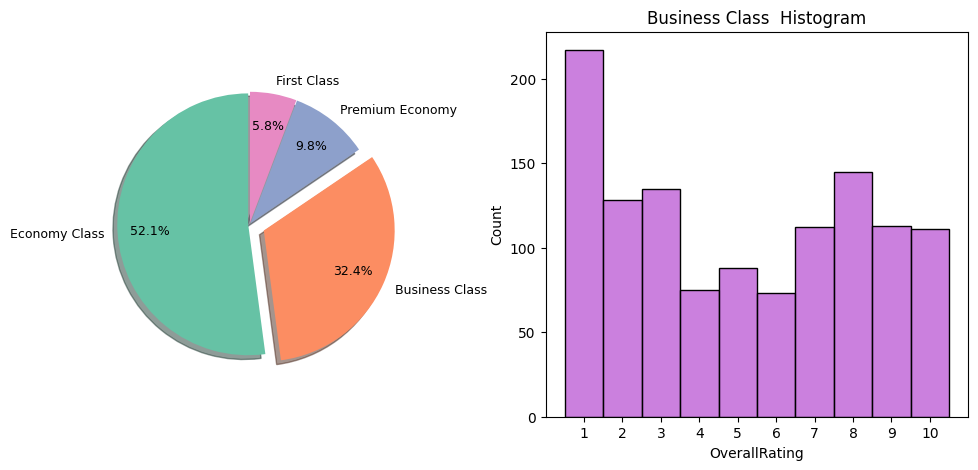

In [10]:
ratings_by_feature('SeatType', 'Business Class')

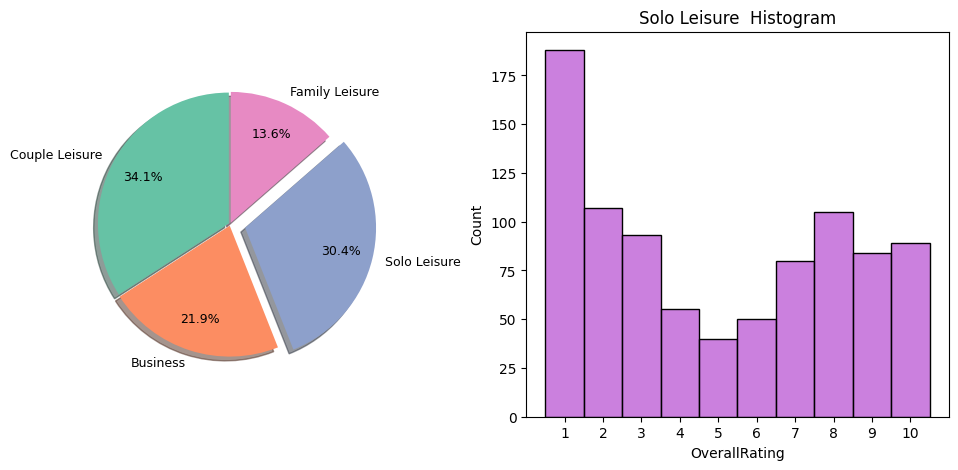

In [11]:
ratings_by_feature('TypeOfTraveller', 'Solo Leisure')

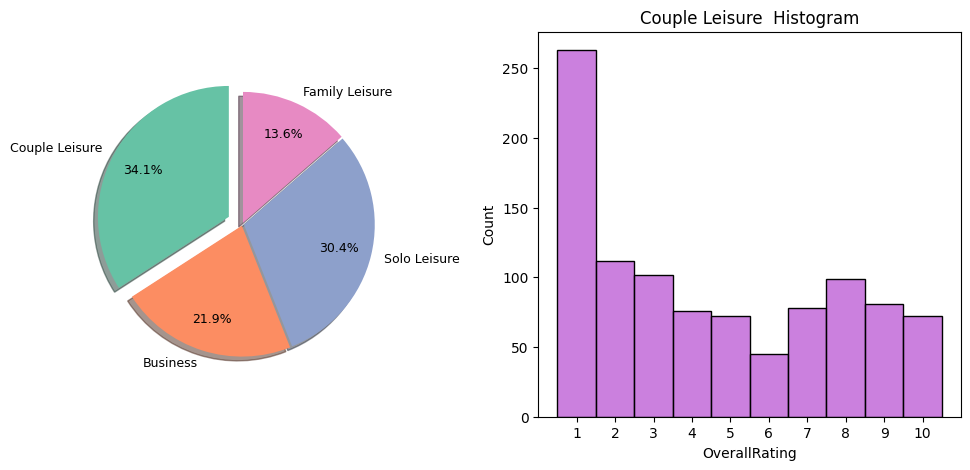

In [12]:
ratings_by_feature('TypeOfTraveller', 'Couple Leisure')

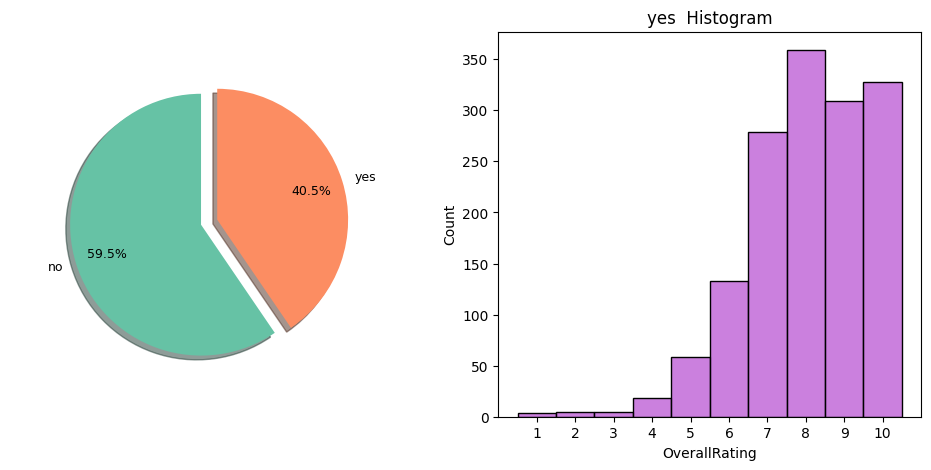

In [13]:
ratings_by_feature('Recommended', 'yes')

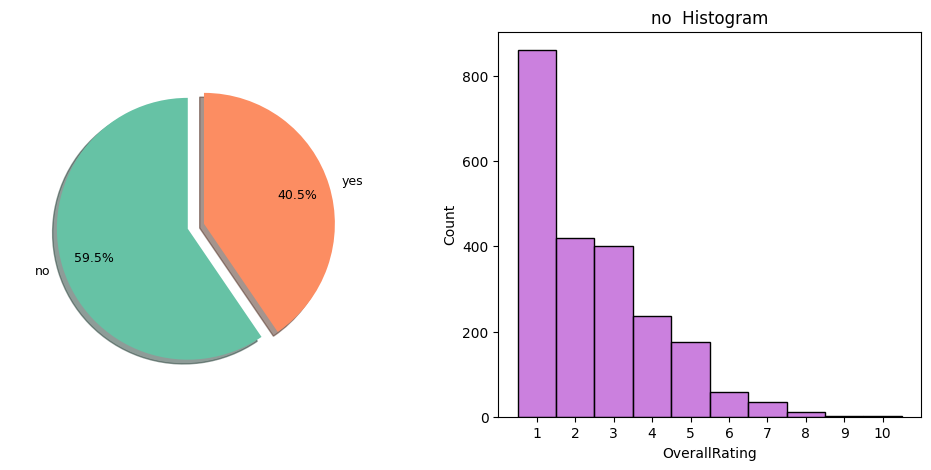

In [14]:
ratings_by_feature('Recommended', 'no')

<br/>
<br/>
<br/>

> # 📄☁️ Word Cloud <a class="anchor" id="cloud"></a>

In [15]:
def get_words(array):
    '''
    Helper function to get the words from the Review Headers and Review Bodies.
    '''
    words = ''
    for elem in array:
        if len(elem)>0:
            words = words  + elem

    words = words.replace('“', "")
    words = words.replace('”', "") 
    
    return words

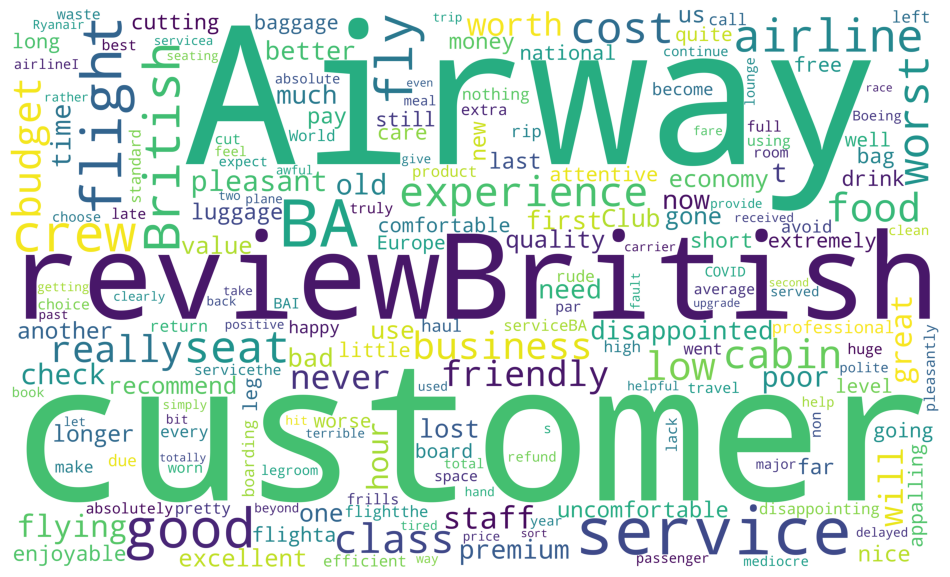

In [16]:
text = ''
for string in list(df.ReviewHeader.apply(lambda x : get_words(x.split("\"")))):
    text = text + string

# Generate a word cloud image
wordcloud = WordCloud().generate(text) 
# Display the generated image: 
wordcloud = WordCloud(width = 5000, height = 3000, background_color='white',collocations = False,).generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud )
plt.axis("off")
plt.show()


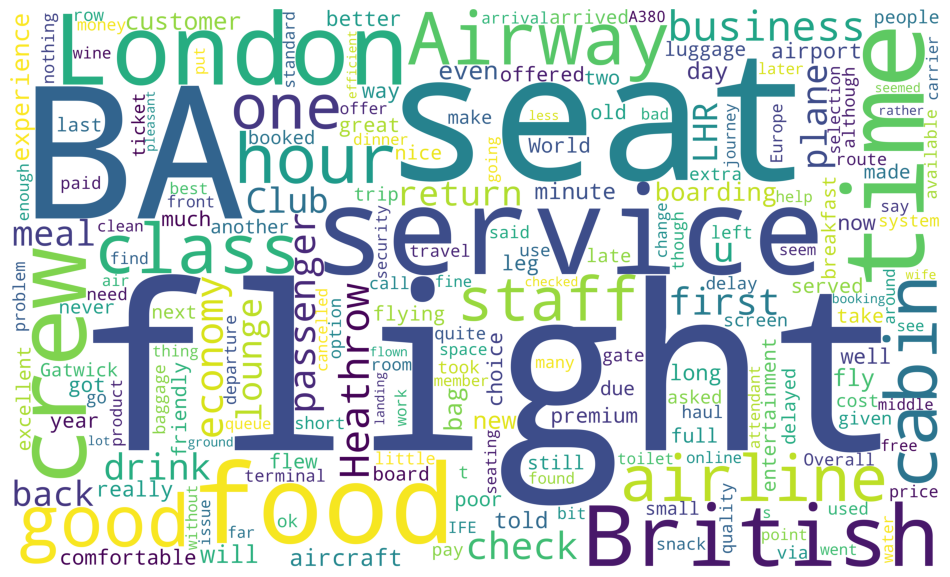

In [17]:
text = ''
for string in list(df.ReviewBody ):
    text = text + string

# Generate a word cloud image
wordcloud = WordCloud().generate(text) 
# Display the generated image: 
wordcloud = WordCloud(width = 5000, height = 3000, background_color='white',collocations = False,).generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud )
plt.axis("off")
plt.show()


<br/>
<br/>
<br/>

# 🧹🗂️ Data Cleaning And   Feature Engineering  🧠🤖<a class="anchor" id="data-cleaning"></a>

<br/>
<br/>
<br/>

> # 😃😐😢 Sentiment Analysis <a class="anchor" id="sentiment"></a>

> > Using Sentiment Analysis to transform review text to numerical value for model training. 

In [18]:
#Sentiment Analysis
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
results = classifier(list(df.ReviewBody[:]),  truncation=True) 
sentiment_score = [x['score'] if x['label']=='POSITIVE'  else 1-x['score'] for x in results]
df['sentiment_score'] = sentiment_score


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [19]:
df['sentiment_score'] = sentiment_score

In [20]:
#Cleaning Data
#These coloumns have a lot of nulls
df = df.drop(['Wifi&Connectivity', 'GroundService', 'InflightEntertainment', 'TypeOfTraveller', 'Route', 'Aircraft', 'DateFlown'], axis=1).dropna()
##One Hot Encoding
df = pd.get_dummies(df, columns = ['VerifiedReview',  'SeatType', ],dtype=float) 

<br/>
<br/>
<br/>

> # 🔥🗺️ Correlation Heat Map <a class="anchor" id="heat"></a>


> >   Removing features with low correlation

In [21]:
df_info(df)

,unique_vals,len,types,nulls
ReviewBody,3298,3307,object,0
sentiment_score,3189,3307,float64,0
Name,2573,3307,object,0
ReviewHeader,2323,3307,object,0
Datetime,1640,3307,object,0
OverallRating,10,3307,float64,0
SeatComfort,5,3307,float64,0
CabinStaffService,5,3307,float64,0
ValueForMoney,5,3307,float64,0
Food&Beverages,5,3307,float64,0


In [22]:
numerical_features = df_info(df)[df_info(df).types=='float64'].index

In [23]:
heatmap_features = list(numerical_features)
heatmap_features.append('Recommended')
df_heat = df[heatmap_features]
df_heat = df_heat.drop('Recommended', axis=1)
df_heat['Recommended'] = df[heatmap_features].Recommended.apply(lambda x : 1 if x=='yes' else 0)

<Axes: >

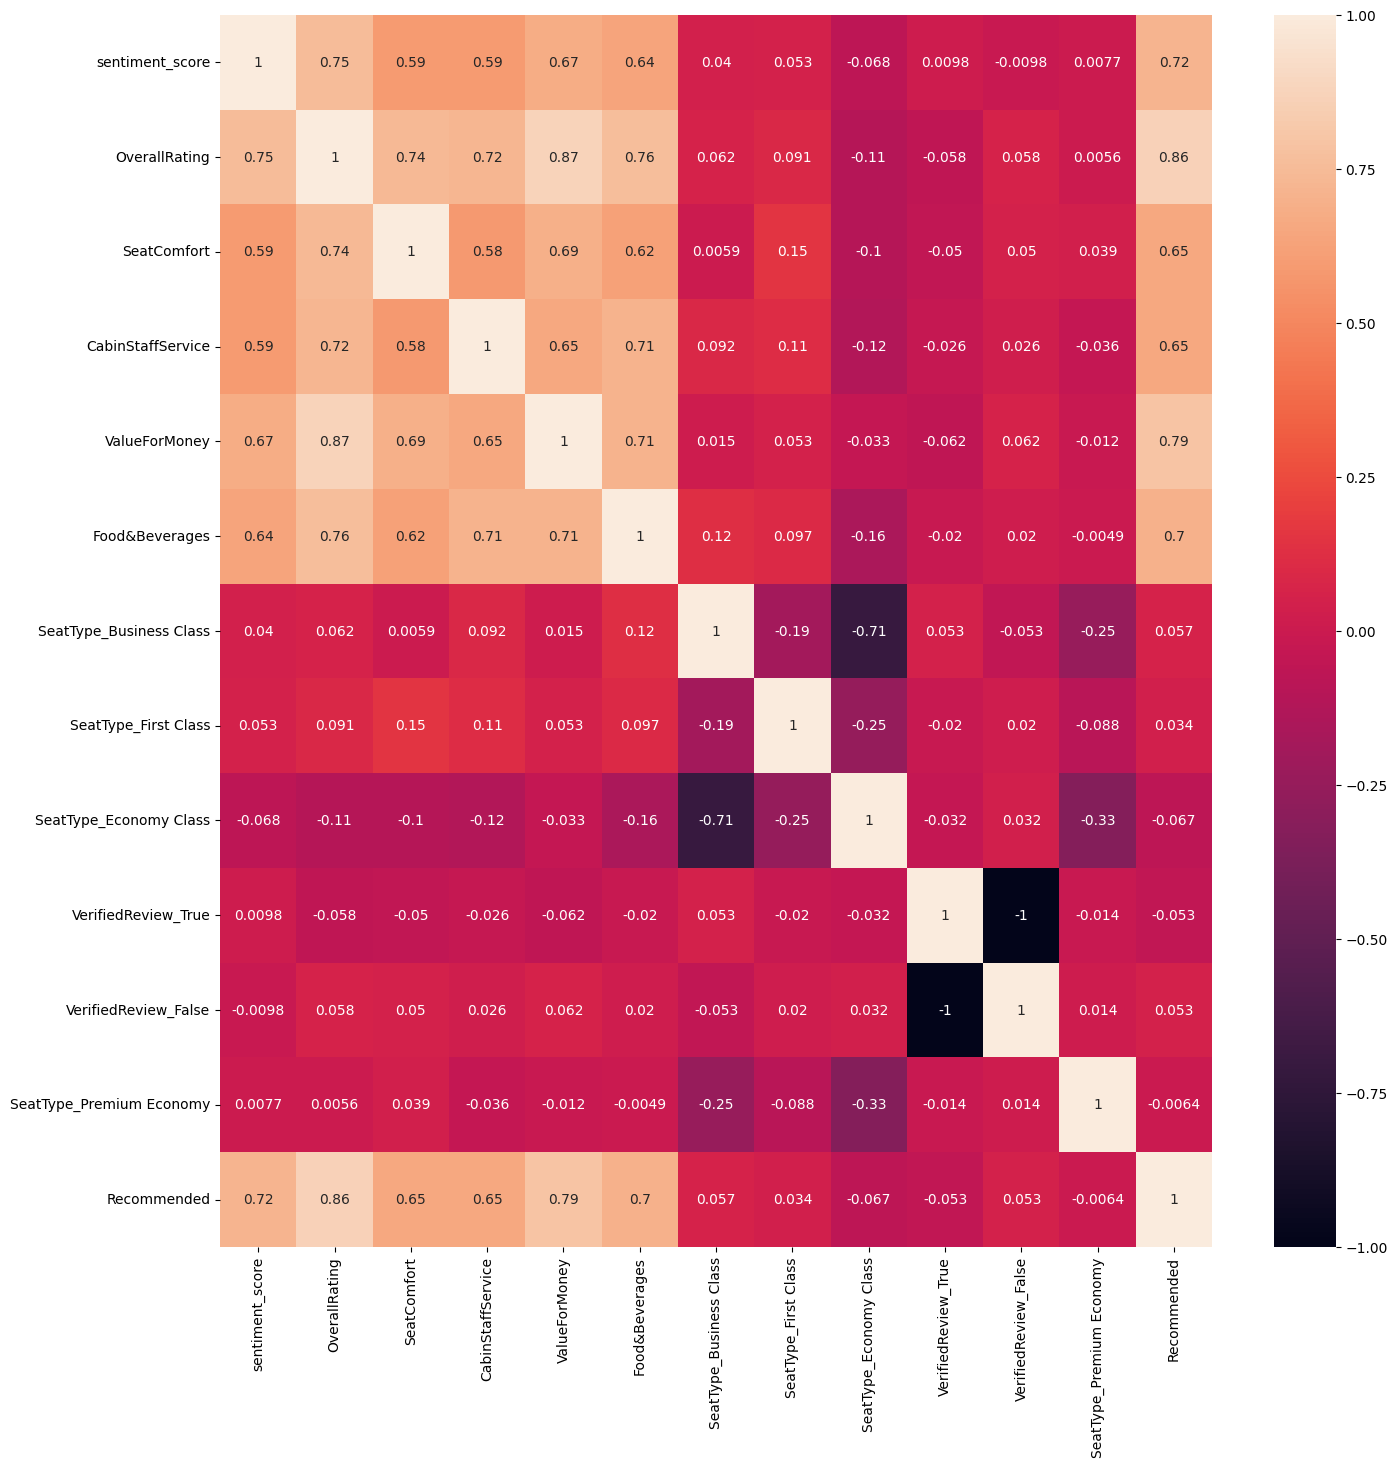

In [24]:
plt.figure(figsize=(16,16))
sns.heatmap(df_heat.corr(), annot=True)

In [25]:
## Low Correlation
df_3_labels = df_heat.drop(['SeatType_Business Class','SeatType_First Class', 'SeatType_Economy Class', 'VerifiedReview_True','VerifiedReview_False', 'SeatType_Premium Economy', ], axis=1)

## Transforming 10 Ratings into 3 classes
## Low Ratings(1-4), Medium Ratings(5-7), High Ratings(8-10)
df_3_labels = df_3_labels.drop(['OverallRating',   ], axis=1)
df_3_labels['labels'] = df_heat['OverallRating'].apply(lambda x : int(0) if x<5 else (int(1) if x<8 else 2))




<br/>
<br/>
<br/>


> ## Visualizing Selected Features  

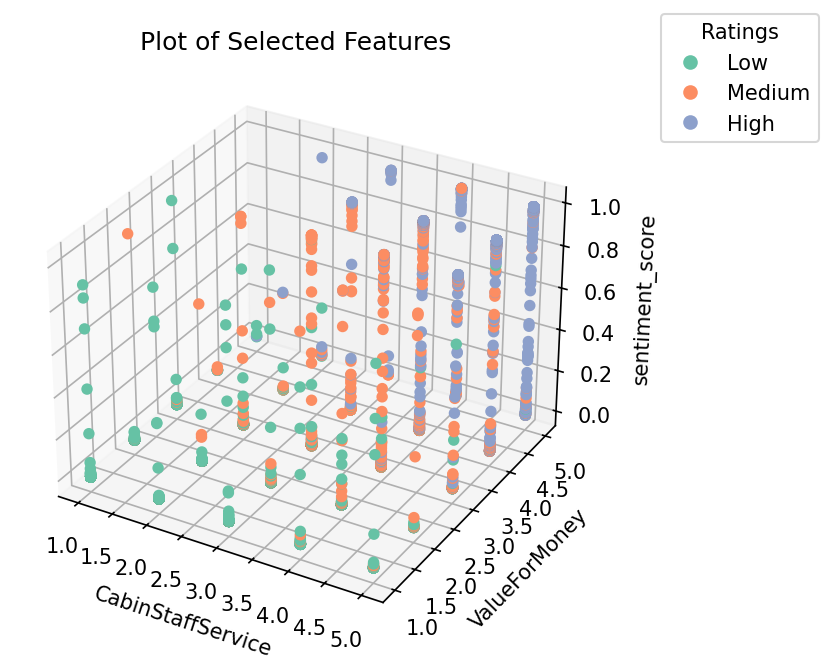

In [26]:
x =df_3_labels["CabinStaffService"]
y =df_3_labels["ValueForMoney"]
z =df_3_labels["sentiment_score"]
cmap = ListedColormap(sns.color_palette('Set2', n_colors=3))
#Plotting the clusters
fig = plt.figure(figsize=(15,5), dpi=150)
ax = plt.subplot( 111, projection='3d', )
sc = ax.scatter(x, y, z, s=20, c=df_3_labels["labels"], marker='o', alpha=1, cmap = cmap , label='safsf')
ax.set_title("Plot of Selected Features  ",)
ax.set_xlabel(x.name)
ax.set_ylabel(y.name)
ax.set_zlabel(z.name)
ax.set
 

L = plt.legend(*sc.legend_elements()   ,bbox_to_anchor=(1.1, 1.1), loc="upper left" , title='Ratings',  ) 
L.get_texts()[0].set_text('Low')
L.get_texts()[1].set_text('Medium')
L.get_texts()[2].set_text('High')
plt.show()

<br/>
<br/>
<br/>

# 📊🔍🤖  Artificial Neural Network <a class="anchor" id="ann"></a>

In [27]:
X_df = df_3_labels.iloc[:,:-1]
y_df = df_3_labels.iloc[:,-1:].astype(int).values

In [28]:
#Data Split
X_train, X_20_percent, y_train, y_20_percent = train_test_split(X_df, y_df, test_size=0.25, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_20_percent, y_20_percent, test_size=0.5, random_state=42)

In [29]:
#Scaling Data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)


In [30]:
X_df.shape

(3307, 6)

In [31]:
X_validation.shape

(413, 6)

> ## Model Architecture <a class="anchor" id="architecture"></a>

In [32]:
# Creating Neural Network
model = Sequential()
model.add(Dense(250, input_dim=6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(250, input_dim=6, activation='relu'))
model.add(Dropout(0.2))
 
 
 
 
model.add(Dense(3,activation=tf.nn.softmax))


> ## Model Training <a class="anchor" id="training"></a>

In [33]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
 
model.fit(x=X_train, y=y_train,batch_size=250, epochs=100, validation_data=(X_validation, y_validation),   verbose=1)


Epoch 1/100


10/10 [==============================] - 1s 15ms/step - loss: 0.9803 - accuracy: 0.5077 - val_loss: 0.8693 - val_accuracy: 0.7240
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7718 - accuracy: 0.7964 - val_loss: 0.6600 - val_accuracy: 0.8136
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5854 - accuracy: 0.8149 - val_loss: 0.5151 - val_accuracy: 0.8015
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4765 - accuracy: 0.8165 - val_loss: 0.4287 - val_accuracy: 0.8039
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4170 - accuracy: 0.8327 - val_loss: 0.3868 - val_accuracy: 0.8184
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3944 - accuracy: 0.8363 - val_loss: 0.3636 - val_accuracy: 0.8354
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3839 - accuracy: 0.8419 - val_loss: 0.3500 - val_accuracy: 0.8354
Epoch 8/1

> ## Model Evaluation <a class="anchor" id="evaluation"></a>

In [34]:
score = model.evaluate(X_test,y_test)
print('Accuracy: ', score[1])

13/13 [==============================] - 0s 917us/step - loss: 0.3256 - accuracy: 0.8720
Accuracy:  0.8719806671142578
